
Estimated Parameters:
θ (degrees) = 28.298255
M = 0.022377
X = 54.897447
Minimum L1 Error = 25.243836


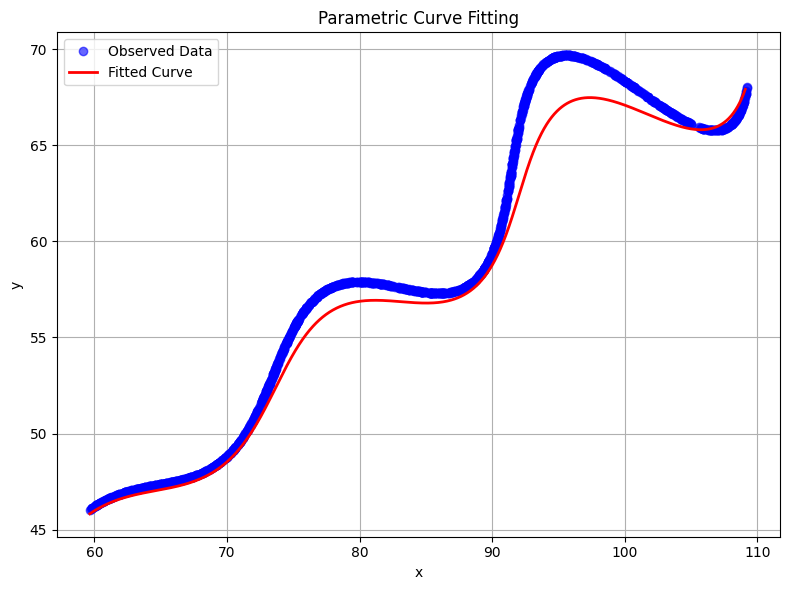


Equation in submission format:

(t*cos(28.2983) - e^(0.022377*|t|)*sin(0.3t)*sin(28.2983) + 54.8974, 42 + t*sin(28.2983) + e^(0.022377*|t|)*sin(0.3t)*cos(28.2983))


In [2]:
"""
Assignment: Research and Development / AI
Problem: Estimate unknown parameters (θ, M, X) in the given parametric curve

x = ( t*cos(θ) - e^(M|t|)*sin(0.3t)*sin(θ) + X )
y = ( 42 + t*sin(θ) + e^(M|t|)*sin(0.3t)*cos(θ) )

Given:
    0° < θ < 50°
   -0.05 < M < 0.05
    0 < X < 100
    6 < t < 60

Objective:
    Minimize the L1 distance between given data points (x_data, y_data)
    and the model-generated (x_pred, y_pred) points.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset

df = pd.read_csv("xy_data.csv")
x_data = df["x"].values
y_data = df["y"].values

# Generate parameter t uniformly across the given range
t = np.linspace(6, 60, len(df))


# 2. Define the model

def model(t, theta_deg, M, X):
    """
    Compute x(t) and y(t) for given parameters.
    """
    theta = np.deg2rad(theta_deg)
    A = np.exp(M * np.abs(t)) * np.sin(0.3 * t)
    x = t * np.cos(theta) - A * np.sin(theta) + X
    y = 42 + t * np.sin(theta) + A * np.cos(theta)
    return x, y


# 3. Define error function (L1 distance)

def l1_error(theta, M, X):
    x_pred, y_pred = model(t, theta, M, X)
    return np.mean(np.abs(x_data - x_pred) + np.abs(y_data - y_pred))


# 4. Random search (global) + refinement

best_params = None
best_error = 1e18

# Global random search
for _ in range(5000):
    theta = np.random.uniform(0, 50)
    M = np.random.uniform(-0.05, 0.05)
    X = np.random.uniform(0, 100)
    error = l1_error(theta, M, X)
    if error < best_error:
        best_error = error
        best_params = (theta, M, X)

# Local refinement around best parameters
theta0, M0, X0 = best_params
for _ in range(5000):
    theta = np.random.normal(theta0, 2)
    M = np.random.normal(M0, 0.005)
    X = np.random.normal(X0, 2)
    if not (0 < theta < 50 and -0.05 < M < 0.05 and 0 < X < 100):
        continue
    error = l1_error(theta, M, X)
    if error < best_error:
        best_error = error
        best_params = (theta, M, X)


# 5. Results

theta_opt, M_opt, X_opt = best_params
print("\nEstimated Parameters:")
print(f"θ (degrees) = {theta_opt:.6f}")
print(f"M = {M_opt:.6f}")
print(f"X = {X_opt:.6f}")
print(f"Minimum L1 Error = {best_error:.6f}")


# 6. Visualization

x_fit, y_fit = model(t, theta_opt, M_opt, X_opt)

plt.figure(figsize=(8,6))
plt.plot(x_data, y_data, 'bo', label='Observed Data', alpha=0.6)
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve', linewidth=2)
plt.title("Parametric Curve Fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Final equation (for Desmos or report)

print("\nEquation in submission format:\n")
print(f"(t*cos({theta_opt:.4f}) - e^({M_opt:.6f}*|t|)*sin(0.3t)*sin({theta_opt:.4f}) + {X_opt:.4f}, "
      f"42 + t*sin({theta_opt:.4f}) + e^({M_opt:.6f}*|t|)*sin(0.3t)*cos({theta_opt:.4f}))")
